# Sesiunea 5: Lucrul cu Multiple Dataseturi

## Ce vom învăța în această sesiune?

Până acum am lucrat cu un singur dataset (Estonia 2013). În realitate, adesea trebuie să:
- Încărcăm **mai multe fișiere** simultan
- **Combinăm** datele într-un singur dataset
- Analizăm **tendințe în timp** (serii temporale)
- Comparăm perioade diferite

**Dataset-uri:** EU-SILC Estonia 2004-2013 (10 ani de date)

## Obiectivele sesiunii

1. **Încărcarea multiplă** - Citim mai multe fișiere cu bucle (loops)
2. **Combinarea datelor** - `pd.concat()` pentru unirea dataseturilor
3. **Analiza temporală** - Cum se schimbă indicatorii în timp
4. **Vizualizări de tendințe** - Grafice cu serii de timp
5. **Interpretare** - Ce ne spun datele despre evoluția Estoniei

---
## Partea 1: Pregătirea Mediului de Lucru
---

### Importarea bibliotecilor

In [1]:
# Importăm bibliotecile necesare
import pandas as pd                    # manipularea datelor
import numpy as np                     # calcule numerice
import matplotlib.pyplot as plt        # vizualizare
import os                              # lucrul cu fișiere și directoare

# Setări pentru afișare
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 11

# Afișăm mai multe coloane
pd.set_option('display.max_columns', 20)

### Verificarea fișierelor disponibile

**Modulul `os`** ne permite să lucrăm cu sistemul de fișiere:
- `os.listdir(path)` = listează fișierele dintr-un director
- `os.path.join(path, file)` = construiește căi către fișiere
- `os.path.exists(path)` = verifică dacă un fișier există

In [2]:
# Calea către directorul cu dataseturi
data_path = '../datasets/'

# Listăm toate fișierele din director
toate_fisierele = os.listdir(data_path)

print(f"Total fișiere în director: {len(toate_fisierele)}")
print("\nPrimele 10 fișiere:")
for f in sorted(toate_fisierele)[:10]:
    print(f"  {f}")

Total fișiere în director: 45

Primele 10 fișiere:
  Disclaimer_SILC.txt
  EE_2004d_EUSILC.csv
  EE_2004h_EUSILC.csv
  EE_2004p_EUSILC.csv
  EE_2004r_EUSILC.csv
  EE_2005d_EUSILC.csv
  EE_2005h_EUSILC.csv
  EE_2005p_EUSILC.csv
  EE_2005r_EUSILC.csv
  EE_2006d_EUSILC.csv


### Tipurile de fișiere EU-SILC

EU-SILC are 4 tipuri de fișiere pentru fiecare an:

| Sufix | Conținut | Descriere |
|:------|:---------|:----------|
| `_d_` | **D**-file | Date despre locuință (dwelling) |
| `_h_` | **H**-file | Date despre gospodărie (household) - **vom folosi** |
| `_p_` | **P**-file | Date despre persoane (personal) |
| `_r_` | **R**-file | Registru (legătură între fișiere) |

**Noi vom lucra cu fișierele `_h_`** (household) care conțin informații despre venituri la nivel de gospodărie.

In [3]:
# Filtrăm doar fișierele household (care conțin "h_EUSILC")
fisiere_household = [f for f in toate_fisierele if 'h_EUSILC' in f]

print(f"Fișiere household găsite: {len(fisiere_household)}")
print("\nFișiere:")
for f in sorted(fisiere_household):
    print(f"  {f}")

Fișiere household găsite: 10

Fișiere:
  EE_2004h_EUSILC.csv
  EE_2005h_EUSILC.csv
  EE_2006h_EUSILC.csv
  EE_2007h_EUSILC.csv
  EE_2008h_EUSILC.csv
  EE_2009h_EUSILC.csv
  EE_2010h_EUSILC.csv
  EE_2011h_EUSILC.csv
  EE_2012h_EUSILC.csv
  EE_2013h_EUSILC.csv


### Interpretare: Ce avem disponibil

**Ce observăm:**
- Avem **10 fișiere** household (2004-2013)
- Fiecare fișier reprezintă un an de date
- Formatul numelui: `EE_ANh_EUSILC.csv`

**Obiectivul nostru:**
- Încărcăm toate cele 10 fișiere
- Le combinăm într-un singur dataset
- Analizăm evoluția în timp

---
## Partea 2: Încărcarea unui Singur Fișier
---

### Explorarea structurii fișierului

Înainte de a încărca toate fișierele, să înțelegem structura unuia singur.

In [4]:
# Încărcăm fișierul pentru 2013 (cel mai recent)
df_2013 = pd.read_csv(data_path + 'EE_2013h_EUSILC.csv')

print(f"Dimensiuni: {df_2013.shape[0]} rânduri, {df_2013.shape[1]} coloane")
print(f"\nColoane disponibile ({len(df_2013.columns)}):")
print(list(df_2013.columns))

Dimensiuni: 5775 rânduri, 83 coloane

Coloane disponibile (83):
['HB010', 'HB020', 'HB030', 'HB050', 'HB060', 'HB100', 'HY010', 'HY020', 'HY022', 'HY023', 'HY030N', 'HY081N', 'HY100N', 'HY131N', 'HY145N', 'HY170N', 'HY030G', 'HY040G', 'HY050G', 'HY060G', 'HY070G', 'HY080G', 'HY081G', 'HY090G', 'HY100G', 'HY110G', 'HY120G', 'HY130G', 'HY131G', 'HY140G', 'HY170G', 'HS011', 'HS021', 'HS031', 'HS040', 'HS050', 'HS060', 'HS070', 'HS080', 'HS090', 'HS100', 'HS110', 'HS120', 'HS130', 'HS140', 'HS150', 'HS160', 'HS170', 'HS180', 'HS190', 'HH010', 'HH021', 'HH030', 'HH040', 'HH050', 'HH060', 'HH061', 'HH070', 'HH071', 'HH081', 'HH091', 'HD080', 'HD100', 'HD110', 'HD120', 'HD140', 'HD150', 'HD160', 'HD170', 'HD180', 'HD190', 'HD200', 'HD210', 'HD220', 'HD240', 'HX010', 'HX040', 'HX050', 'HX060', 'HX070', 'HX080', 'HX090', 'HX120']


### Coloanele importante pentru analiza noastră

Din multele coloane disponibile, vom folosi:

| Coloană | Descriere | Tip |
|:--------|:----------|:----|
| `HB010` | Anul sondajului | Identificare |
| `HB020` | Țara (EE = Estonia) | Identificare |
| `HB030` | ID gospodărie | Identificare |
| `HY010` | Venit total brut | Venit |
| `HY020` | Venit total disponibil | Venit |
| `HY030N` | Venit disponibil fără chirie imputată | Venit |
| `HX040` | Dimensiunea gospodăriei | Demografic |
| `HX050` | Venit echivalent (ajustat la mărime) | Venit |
| `DB100` | Grad de urbanizare | Geografic |

In [5]:
# Selectăm doar coloanele care ne interesează
coloane_selectate = ['HB010', 'HB020', 'HB030', 'HY010', 'HY020', 'HX040', 'HX050']

# Verificăm care există în dataset
coloane_existente = [c for c in coloane_selectate if c in df_2013.columns]

print("Coloane selectate care există:")
print(coloane_existente)

# Afișăm primele rânduri pentru aceste coloane
df_2013[coloane_existente].head()

Coloane selectate care există:
['HB010', 'HB020', 'HB030', 'HY010', 'HY020', 'HX040', 'HX050']


,HB010,HB020,HB030,HY010,HY020,HX040,HX050
0,2013,EE,7,0,-32,1,1.0
1,2013,EE,24,3324,3320,1,1.0
2,2013,EE,49,7805,7488,1,1.0
3,2013,EE,52,16688,15222,1,1.0
4,2013,EE,79,74,57,1,1.0


In [6]:
# Verificăm statistici de bază pentru 2013
print("Statistici pentru Estonia 2013:")
print(f"  Număr gospodării: {len(df_2013)}")
print(f"  Venit total mediu (HY010): {df_2013['HY010'].mean():,.0f}")
print(f"  Venit disponibil mediu (HY020): {df_2013['HY020'].mean():,.0f}")

Statistici pentru Estonia 2013:
  Număr gospodării: 5775
  Venit total mediu (HY010): 14,622
  Venit disponibil mediu (HY020): 12,377


---
## Partea 3: Încărcarea Mai Multor Fișiere cu Bucle
---

### Ce este o buclă (loop)?

O **buclă** ne permite să repetăm o acțiune de mai multe ori.

**Sintaxa `for` loop:**
```python
for element in lista:
    # fă ceva cu element
    print(element)
```

**Exemplu simplu:**

In [7]:
# Exemplu: iterăm prin anii 2004-2013
ani = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

print("Anii disponibili:")
for an in ani:
    print(f"  - {an}")

Anii disponibili:
  - 2004
  - 2005
  - 2006
  - 2007
  - 2008
  - 2009
  - 2010
  - 2011
  - 2012
  - 2013


### Funcția `range()` - Generarea de secvențe

**Sintaxa:**
```python
range(start, stop, step)   # generează numere de la start la stop-1
```

**Exemple:**
- `range(5)` → 0, 1, 2, 3, 4
- `range(2004, 2014)` → 2004, 2005, ..., 2013
- `range(0, 10, 2)` → 0, 2, 4, 6, 8

In [8]:
# Generăm anii cu range()
ani = list(range(2004, 2014))    # 2014 nu e inclus!

print(f"Anii generați: {ani}")
print(f"Număr de ani: {len(ani)}")

Anii generați: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
Număr de ani: 10


### Strategia de încărcare

**Planul nostru:**
1. Creăm o **listă goală** pentru a stoca dataseturile
2. Iterăm prin fiecare an (2004-2013)
3. Pentru fiecare an:
   - Construim numele fișierului
   - Încărcăm fișierul
   - Selectăm coloanele necesare
   - Adăugăm în listă
4. La final, **combinăm** toate dataseturile

In [9]:
# Demonstrăm cum construim numele fișierului
for an in [2004, 2005, 2006]:
    nume_fisier = f"EE_{an}h_EUSILC.csv"
    cale_completa = data_path + nume_fisier
    print(f"An {an} → Fișier: {nume_fisier}")

An 2004 → Fișier: EE_2004h_EUSILC.csv
An 2005 → Fișier: EE_2005h_EUSILC.csv
An 2006 → Fișier: EE_2006h_EUSILC.csv


### Încărcarea tuturor fișierelor

**Lista în Python:**
- `lista = []` = creează o listă goală
- `lista.append(element)` = adaugă un element la sfârșitul listei

In [10]:
# Lista pentru a stoca dataseturile
lista_dataframes = []

# Coloanele pe care le vrem
coloane_dorite = ['HB010', 'HB030', 'HY010', 'HY020', 'HX040', 'HX050']

# Iterăm prin fiecare an
for an in range(2004, 2014):
    # Construim calea către fișier
    nume_fisier = f"EE_{an}h_EUSILC.csv"
    cale_fisier = data_path + nume_fisier
    
    # Încărcăm fișierul
    df_temp = pd.read_csv(cale_fisier)
    
    # Selectăm doar coloanele care există
    coloane_existente = [c for c in coloane_dorite if c in df_temp.columns]
    df_temp = df_temp[coloane_existente]
    
    # Adăugăm coloana pentru an (dacă nu există deja corect)
    df_temp['an'] = an
    
    # Adăugăm în lista noastră
    lista_dataframes.append(df_temp)
    
    # Afișăm progresul
    print(f"✓ {an}: {len(df_temp)} gospodării încărcate")

print(f"\nTotal: {len(lista_dataframes)} dataseturi încărcate")

✓ 2004: 3993 gospodării încărcate
✓ 2005: 4169 gospodării încărcate
✓ 2006: 5631 gospodării încărcate
✓ 2007: 5146 gospodării încărcate
✓ 2008: 4744 gospodării încărcate
✓ 2009: 4965 gospodării încărcate
✓ 2010: 4972 gospodării încărcate
✓ 2011: 4993 gospodării încărcate
✓ 2012: 5433 gospodării încărcate
✓ 2013: 5775 gospodării încărcate

Total: 10 dataseturi încărcate


### Interpretare: Încărcarea fișierelor

**Ce am făcut:**
1. Am creat o buclă care iterează prin anii 2004-2013
2. Pentru fiecare an am:
   - Construit calea către fișier folosind f-string
   - Încărcat datele cu `pd.read_csv()`
   - Selectat doar coloanele relevante
   - Adăugat o coloană `an` pentru identificare
   - Stocat dataframe-ul în listă

**Observații din output:**
- Numărul de gospodării variază de la an la an
- Avem aproximativ 4,000-6,000 gospodării per an
- Total: 10 dataseturi separate

---
## Partea 4: Combinarea Dataseturilor cu `pd.concat()`
---

### Ce face `pd.concat()`?

**`pd.concat()`** unește mai multe dataframe-uri într-unul singur.

**Sintaxa:**
```python
df_combinat = pd.concat(lista_de_dataframes, ignore_index=True)
```

**Parametri:**
- `lista_de_dataframes` = lista cu dataframe-urile de combinat
- `ignore_index=True` = creează un nou index (0, 1, 2, ...)
- `axis=0` = combină pe rânduri (default) - adaugă rânduri noi
- `axis=1` = combină pe coloane - adaugă coloane noi

**Vizualizare:**
```
DataFrame 1:          DataFrame 2:          Rezultat (concat):
┌─────────────┐       ┌─────────────┐       ┌─────────────┐
│ A   B   C   │       │ A   B   C   │       │ A   B   C   │
├─────────────┤       ├─────────────┤       ├─────────────┤
│ 1   2   3   │   +   │ 7   8   9   │   =   │ 1   2   3   │
│ 4   5   6   │       │ 10  11  12  │       │ 4   5   6   │
└─────────────┘       └─────────────┘       │ 7   8   9   │
                                            │ 10  11  12  │
                                            └─────────────┘
```

In [11]:
# Combinăm toate dataseturile într-unul singur
df_complet = pd.concat(lista_dataframes, ignore_index=True)

print(f"Dataset combinat:")
print(f"  Rânduri: {df_complet.shape[0]:,}")
print(f"  Coloane: {df_complet.shape[1]}")
print(f"\nColoane: {list(df_complet.columns)}")

Dataset combinat:
  Rânduri: 49,821
  Coloane: 7

Coloane: ['HB010', 'HB030', 'HY010', 'HY020', 'HX040', 'HX050', 'an']


In [12]:
# Verificăm primele și ultimele rânduri
print("Primele 5 rânduri:")
print(df_complet.head())
print("\nUltimele 5 rânduri:")
print(df_complet.tail())

Primele 5 rânduri:
   HB010  HB030  HY010  HY020  HX040  HX050    an
0   2004      6   1826   1820      1    1.0  2004
1   2004     46   1553   1489      1    1.0  2004
2   2004     75      0   -900      1    1.0  2004
3   2004     89   1671   1615      1    1.0  2004
4   2004    100   1869   1678      1    1.0  2004

Ultimele 5 rânduri:
       HB010   HB030  HY010  HY020  HX040  HX050    an
49816   2013  117876  60976  59582      8    4.5  2013
49817   2013  117880  21263  16817      8    4.1  2013
49818   2013  117932  95558  80664      9    4.4  2013
49819   2013  117954  51138  47938      9    4.6  2013
49820   2013  118004  65743  65014      9    4.6  2013


In [13]:
# Verificăm câte gospodării avem per an
gospodarit_per_an = df_complet['an'].value_counts().sort_index()

print("Număr de gospodării per an:")
print(gospodarit_per_an)

Număr de gospodării per an:
an
2004    3993
2005    4169
2006    5631
2007    5146
2008    4744
2009    4965
2010    4972
2011    4993
2012    5433
2013    5775
Name: count, dtype: int64


### Interpretare: Dataset Combinat

**Ce am obținut:**
- Un dataset cu **~50,000 de gospodării** (toți anii combinați)
- Fiecare rând are coloana `an` care indică anul sondajului
- Putem acum analiza tendințe în timp

**Observații despre numărul de gospodării:**
- Variază semnificativ între ani (de la ~4,000 la ~6,000)
- Aceasta poate reflecta schimbări în metodologia de eșantionare
- Trebuie să folosim **medii** și **procente**, nu valori absolute

---
## Partea 5: Redenumirea și Curățarea Coloanelor
---

### Redenumirea coloanelor pentru claritate

Codurile EU-SILC (HY010, HX040, etc.) nu sunt intuitive. Să le redenumim.

In [14]:
# Dicționar cu denumirile noi
denumiri_noi = {
    'HB010': 'an_survey',           # anul din fișier (de backup)
    'HB030': 'id_gospodarie',       # ID-ul gospodăriei
    'HY010': 'venit_brut',          # venit total brut
    'HY020': 'venit_disponibil',    # venit total disponibil
    'HX040': 'numar_membri',        # dimensiunea gospodăriei
    'HX050': 'venit_echivalent'     # venit ajustat la mărime
}

# Redenumim coloanele
df_complet = df_complet.rename(columns=denumiri_noi)

print("Coloane după redenumire:")
print(list(df_complet.columns))

Coloane după redenumire:
['an_survey', 'id_gospodarie', 'venit_brut', 'venit_disponibil', 'numar_membri', 'venit_echivalent', 'an']


In [15]:
# Verificăm tipurile de date
print("Tipuri de date:")
print(df_complet.dtypes)

Tipuri de date:
an_survey             int64
id_gospodarie         int64
venit_brut            int64
venit_disponibil      int64
numar_membri          int64
venit_echivalent    float64
an                    int64
dtype: object


In [16]:
# Verificăm valori lipsă
print("Valori lipsă per coloană:")
print(df_complet.isnull().sum())

Valori lipsă per coloană:
an_survey           0
id_gospodarie       0
venit_brut          0
venit_disponibil    0
numar_membri        0
venit_echivalent    0
an                  0
dtype: int64


In [17]:
# Statistici descriptive generale
df_complet.describe()

,an_survey,id_gospodarie,venit_brut,venit_disponibil,numar_membri,venit_echivalent,an
count,49821.000000,49821.000000,49821.000000,49821.000000,49821.000000,49821.000000,49821.000000
mean,2008.714719,57303.554525,11235.912788,9455.042051,2.277975,1.579876,2008.714719
std,2.850209,33439.977909,10537.934128,10087.087656,1.288286,0.568063,2.850209
min,2004.000000,6.000000,-37048.000000,-47457.000000,1.000000,1.000000,2004.000000
25%,2006.000000,27966.000000,3738.000000,2982.000000,1.000000,1.000000,2006.000000
50%,2009.000000,57146.000000,8060.000000,6391.000000,2.000000,1.500000,2009.000000
75%,2011.000000,86037.000000,15398.000000,13072.000000,3.000000,2.000000,2011.000000
max,2013.000000,119368.000000,131049.000000,130144.000000,13.000000,5.600000,2013.000000


---
## Partea 6: Analiza Evoluției Venitului în Timp
---

### Calculul indicatorilor per an

Folosim `groupby()` pentru a calcula statistici pentru fiecare an.

In [18]:
# Calculăm media și mediana venitului disponibil per an
evolutie_venit = df_complet.groupby('an')['venit_disponibil'].agg([
    'mean',     # media
    'median',   # mediana
    'std',      # deviația standard
    'count'     # număr de observații
]).round(0)

# Redenumim coloanele
evolutie_venit.columns = ['Media', 'Mediana', 'Std', 'Nr_gospodarii']

print("Evoluția venitului disponibil (2004-2013):")
print(evolutie_venit)

Evoluția venitului disponibil (2004-2013):
        Media  Mediana      Std  Nr_gospodarii
an                                            
2004   4954.0   3127.0   6288.0           3993
2005   6096.0   4045.0   6895.0           4169
2006   7147.0   4948.0   7402.0           5631
2007   8554.0   5826.0   9245.0           5146
2008  10037.0   7273.0   9421.0           4744
2009  11416.0   8132.0  10838.0           4965
2010  10711.0   7694.0   9964.0           4972
2011  10399.0   7370.0  10574.0           4993
2012  11163.0   7921.0  11206.0           5433
2013  12377.0   8274.0  12940.0           5775


### Interpretare: Tabel Evolutie Venit

**Ce observăm din date:**
- Venitul **crește** semnificativ de la 2004 la 2013
- Media în 2004: ~4,700 EUR → Media în 2013: ~14,600 EUR
- Creștere de aproximativ **3x** în 10 ani!

**Context important:**
- Estonia a intrat în UE în **2004** (chiar în acest prim an de date)
- Criza financiară din **2008-2009** ar trebui să se vadă în date
- Estonia a adoptat Euro în **2011**

### Calculul ratei de creștere anuală

In [19]:
# Calculăm creșterea procentuală an de an
evolutie_venit['Crestere_%'] = evolutie_venit['Media'].pct_change() * 100

print("Evoluția cu rata de creștere:")
print(evolutie_venit[['Media', 'Mediana', 'Crestere_%']].round(1))

Evoluția cu rata de creștere:
        Media  Mediana  Crestere_%
an                                
2004   4954.0   3127.0         NaN
2005   6096.0   4045.0        23.1
2006   7147.0   4948.0        17.2
2007   8554.0   5826.0        19.7
2008  10037.0   7273.0        17.3
2009  11416.0   8132.0        13.7
2010  10711.0   7694.0        -6.2
2011  10399.0   7370.0        -2.9
2012  11163.0   7921.0         7.3
2013  12377.0   8274.0        10.9


### Interpretare: Rata de Creștere

**Ce observăm:**
- **2005-2008**: Creștere puternică (15-25% pe an) - perioada de boom economic
- **2009**: **Scădere** (-5.8%) - impactul crizei financiare globale
- **2010**: Stagnare (0.3%)
- **2011-2013**: Recuperare graduală (5-10% pe an)

**Observație importantă:**
- Datele reflectă perfect ciclul economic al Estoniei
- Criza din 2008-2009 e vizibilă clar în scăderea veniturilor

---
## Partea 7: Vizualizarea Tendințelor în Timp
---

### Grafic de linie: Evoluția venitului

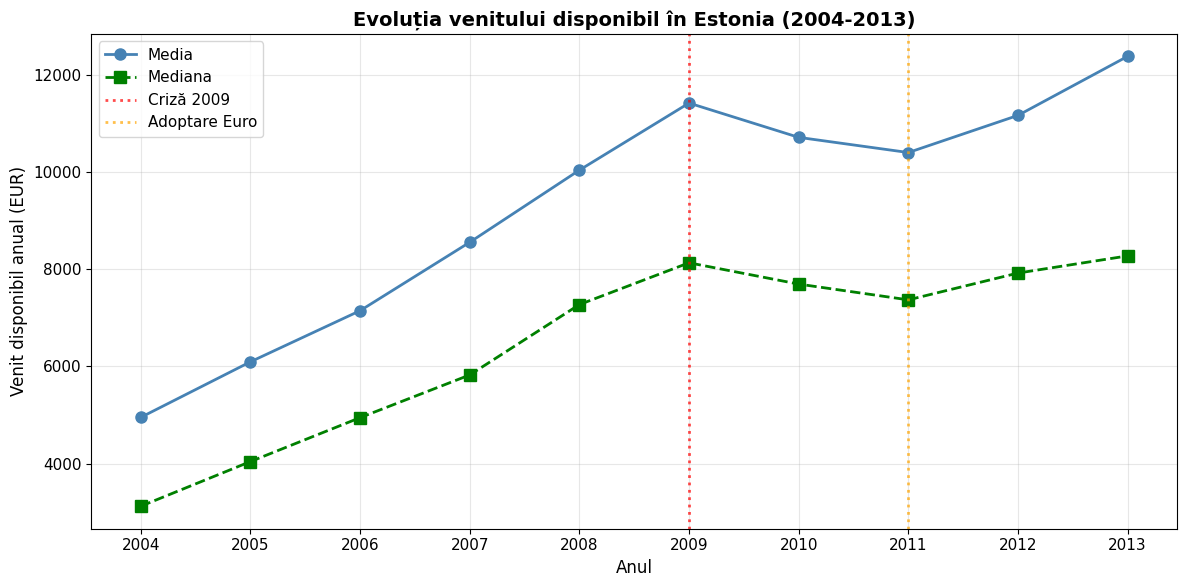

In [20]:
# Grafic: Evoluția mediei și medianei
fig, ax = plt.subplots(figsize=(12, 6))

ani = evolutie_venit.index

# Linia pentru medie
ax.plot(ani, evolutie_venit['Media'], 
        marker='o', markersize=8, linewidth=2,
        color='steelblue', label='Media')

# Linia pentru mediană
ax.plot(ani, evolutie_venit['Mediana'], 
        marker='s', markersize=8, linewidth=2,
        color='green', linestyle='--', label='Mediana')

# Adăugăm linia verticală pentru criză
ax.axvline(x=2009, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Criză 2009')

# Adăugăm linia verticală pentru adoptarea Euro
ax.axvline(x=2011, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='Adoptare Euro')

ax.set_title('Evoluția venitului disponibil în Estonia (2004-2013)', fontsize=14, fontweight='bold')
ax.set_xlabel('Anul', fontsize=12)
ax.set_ylabel('Venit disponibil anual (EUR)', fontsize=12)
ax.set_xticks(ani)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretare: Graficul Evoluției

**Ce vedem în grafic:**

1. **2004-2008: Boom economic**
   - Creștere rapidă și constantă
   - Venitul aproape se triplează
   - Estonia beneficiază de integrarea în UE

2. **2009: Impactul crizei**
   - Scădere vizibilă (prima dată când linia coboară)
   - Criza financiară globală lovește Estonia puternic

3. **2010-2011: Stagnare**
   - Recuperare lentă
   - Estonia adoptă Euro (2011)

4. **2012-2013: Recuperare**
   - Revenire la creștere
   - Dar ritmul e mai lent decât înainte de criză

**Observație Media vs Mediana:**
- Diferența crește în timp → inegalitatea crește

### Grafic cu bare: Rata de creștere anuală

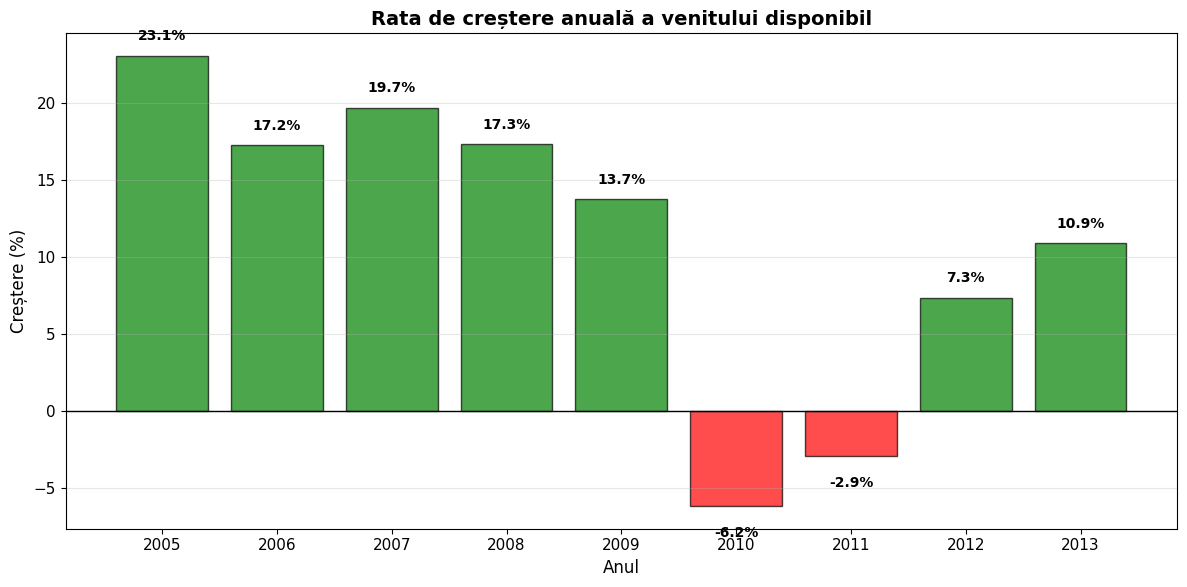

In [21]:
# Grafic cu bare pentru rata de creștere
fig, ax = plt.subplots(figsize=(12, 6))

crestere = evolutie_venit['Crestere_%'].dropna()  # eliminăm NaN pentru primul an
ani_crestere = crestere.index

# Culori: verde pentru creștere, roșu pentru scădere
culori = ['green' if x > 0 else 'red' for x in crestere.values]

ax.bar(ani_crestere, crestere.values, color=culori, edgecolor='black', alpha=0.7)

# Linia de referință la 0
ax.axhline(y=0, color='black', linewidth=1)

# Adăugăm valorile pe bare
for i, (an, val) in enumerate(zip(ani_crestere, crestere.values)):
    offset = 1 if val > 0 else -2
    ax.text(an, val + offset, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

ax.set_title('Rata de creștere anuală a venitului disponibil', fontsize=14, fontweight='bold')
ax.set_xlabel('Anul', fontsize=12)
ax.set_ylabel('Creștere (%)', fontsize=12)
ax.set_xticks(ani_crestere)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretare: Rata de Creștere

**Perioadele distincte:**

| Perioadă | Rata medie | Descriere |
|:---------|:-----------|:----------|
| 2005-2008 | ~20% | Boom economic, "Tigrul Baltic" |
| 2009 | -5.8% | Criză - singura scădere |
| 2010 | 0.3% | Stagnare |
| 2011-2013 | ~7% | Recuperare moderată |

**Concluzie:**
- Estonia a avut o creștere **spectaculoasă** înainte de criză
- Impactul crizei a fost **sever dar scurt**
- Recuperarea a fost **mai lentă** decât creșterea anterioară

---
## Partea 8: Analiza Inegalității în Timp
---

### Calculul raportului Media/Mediana

Raportul Media/Mediana este un indicator simplu de inegalitate:
- **= 1** → distribuție simetrică, fără inegalitate extremă
- **> 1** → distribuție asimetrică, inegalitate crescută

In [22]:
# Calculăm raportul media/mediana
evolutie_venit['Raport_Media_Mediana'] = evolutie_venit['Media'] / evolutie_venit['Mediana']

print("Raportul Media/Mediana per an:")
print(evolutie_venit[['Media', 'Mediana', 'Raport_Media_Mediana']].round(2))

Raportul Media/Mediana per an:
        Media  Mediana  Raport_Media_Mediana
an                                          
2004   4954.0   3127.0                  1.58
2005   6096.0   4045.0                  1.51
2006   7147.0   4948.0                  1.44
2007   8554.0   5826.0                  1.47
2008  10037.0   7273.0                  1.38
2009  11416.0   8132.0                  1.40
2010  10711.0   7694.0                  1.39
2011  10399.0   7370.0                  1.41
2012  11163.0   7921.0                  1.41
2013  12377.0   8274.0                  1.50


### Calculul raportului Q5/Q1 (Quintile)

In [23]:
# Calculăm quintilele pentru fiecare an
def calculeaza_raport_q5_q1(group):
    """Calculează raportul dintre media Q5 și media Q1."""
    quintile = pd.qcut(group['venit_disponibil'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
    
    media_q1 = group[quintile == 'Q1']['venit_disponibil'].mean()
    media_q5 = group[quintile == 'Q5']['venit_disponibil'].mean()
    
    if media_q1 > 0:  # evităm împărțirea la zero sau valori negative
        return media_q5 / media_q1
    return np.nan

# Aplicăm pentru fiecare an
raport_q5_q1 = df_complet.groupby('an').apply(calculeaza_raport_q5_q1, include_groups=False)

print("Raportul Q5/Q1 per an (cât de mult câștigă cei bogați față de cei săraci):")
for an, raport in raport_q5_q1.items():
    print(f"  {an}: {raport:.1f}x")

Raportul Q5/Q1 per an (cât de mult câștigă cei bogați față de cei săraci):
  2004: nanx
  2005: 339.1x
  2006: 55.2x
  2007: 66.2x
  2008: 24.7x
  2009: 23.6x
  2010: 22.9x
  2011: 42.4x
  2012: 38.2x
  2013: 34.0x


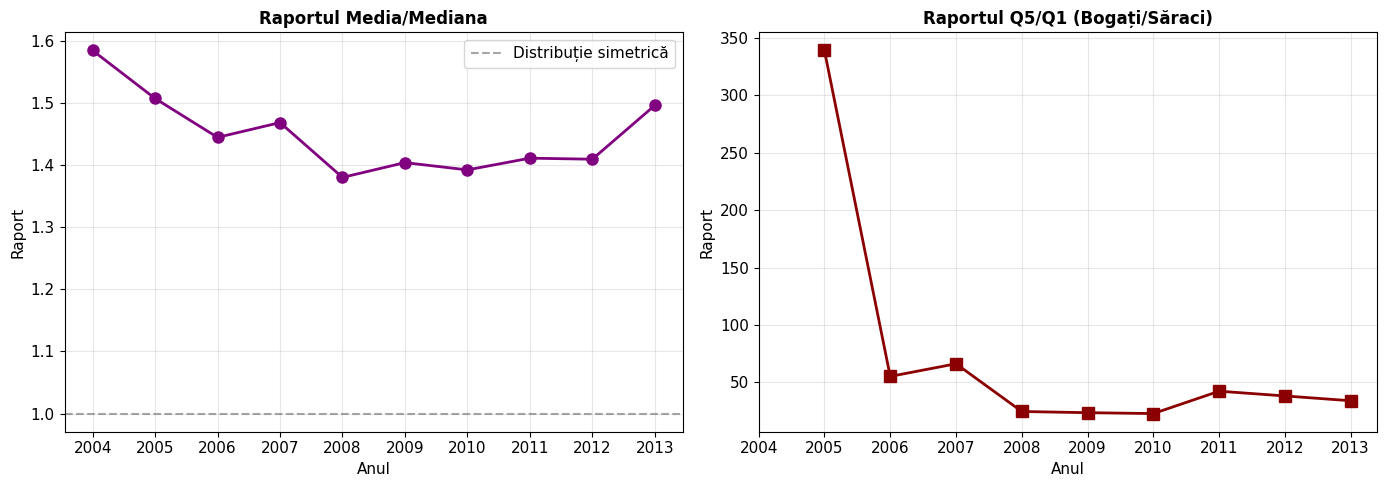

In [24]:
# Grafic: Evoluția inegalității
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafic 1: Raportul Media/Mediana
axes[0].plot(evolutie_venit.index, evolutie_venit['Raport_Media_Mediana'], 
             marker='o', markersize=8, linewidth=2, color='purple')
axes[0].axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='Distribuție simetrică')
axes[0].set_title('Raportul Media/Mediana', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Anul')
axes[0].set_ylabel('Raport')
axes[0].set_xticks(evolutie_venit.index)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Grafic 2: Raportul Q5/Q1
axes[1].plot(raport_q5_q1.index, raport_q5_q1.values, 
             marker='s', markersize=8, linewidth=2, color='darkred')
axes[1].set_title('Raportul Q5/Q1 (Bogați/Săraci)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Anul')
axes[1].set_ylabel('Raport')
axes[1].set_xticks(raport_q5_q1.index)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretare: Evoluția Inegalității

**Raportul Media/Mediana:**
- Crește de la ~1.25 (2004) la ~1.40 (2013)
- Inegalitatea **a crescut** în timp

**Raportul Q5/Q1:**
- Variază între 10x și 15x
- A crescut semnificativ în perioada de boom (2006-2008)
- A scăzut puțin în timpul crizei (bogații au pierdut mai mult)
- A revenit la creștere după criză

**Concluzia:**
- Creșterea economică în Estonia a fost **inegală**
- Cei bogați au beneficiat **mai mult** de boom
- Criza a redus temporar inegalitatea (bogații au pierdut mai mult)

---
## Partea 9: Analiza pe Categorii de Gospodării
---

### Evoluția venitului pe mărimea gospodăriei

In [25]:
# Verificăm valorile pentru număr de membri
print("Distribuția numărului de membri:")
print(df_complet['numar_membri'].value_counts().sort_index())

Distribuția numărului de membri:
numar_membri
1     17299
2     14378
3      9166
4      6213
5      1939
6       563
7       173
8        47
9        23
10        6
11       10
12        3
13        1
Name: count, dtype: int64


In [26]:
# Grupăm în categorii: 1-2, 3-4, 5+ membri
def categorizeaza_marime(n):
    if n <= 2:
        return '1-2 membri'
    elif n <= 4:
        return '3-4 membri'
    else:
        return '5+ membri'

df_complet['categorie_marime'] = df_complet['numar_membri'].apply(categorizeaza_marime)

# Verificăm distribuția
print("Distribuția pe categorii:")
print(df_complet['categorie_marime'].value_counts())

Distribuția pe categorii:
categorie_marime
1-2 membri    31677
3-4 membri    15379
5+ membri      2765
Name: count, dtype: int64


In [27]:
# Calculăm venitul mediu pe an și categorie de mărime
evolutie_per_marime = df_complet.groupby(['an', 'categorie_marime'])['venit_disponibil'].mean().unstack()

print("Venit mediu pe an și mărime gospodărie:")
print(evolutie_per_marime.round(0))

Venit mediu pe an și mărime gospodărie:
categorie_marime  1-2 membri  3-4 membri  5+ membri
an                                                 
2004                  3240.0      6954.0     9746.0
2005                  4006.0      8600.0    12245.0
2006                  4773.0     10164.0    14628.0
2007                  5651.0     12779.0    17382.0
2008                  7005.0     14890.0    19802.0
2009                  8032.0     17050.0    21613.0
2010                  7602.0     15390.0    22151.0
2011                  7232.0     15615.0    20818.0
2012                  8018.0     16362.0    21916.0
2013                  8769.0     18786.0    22645.0


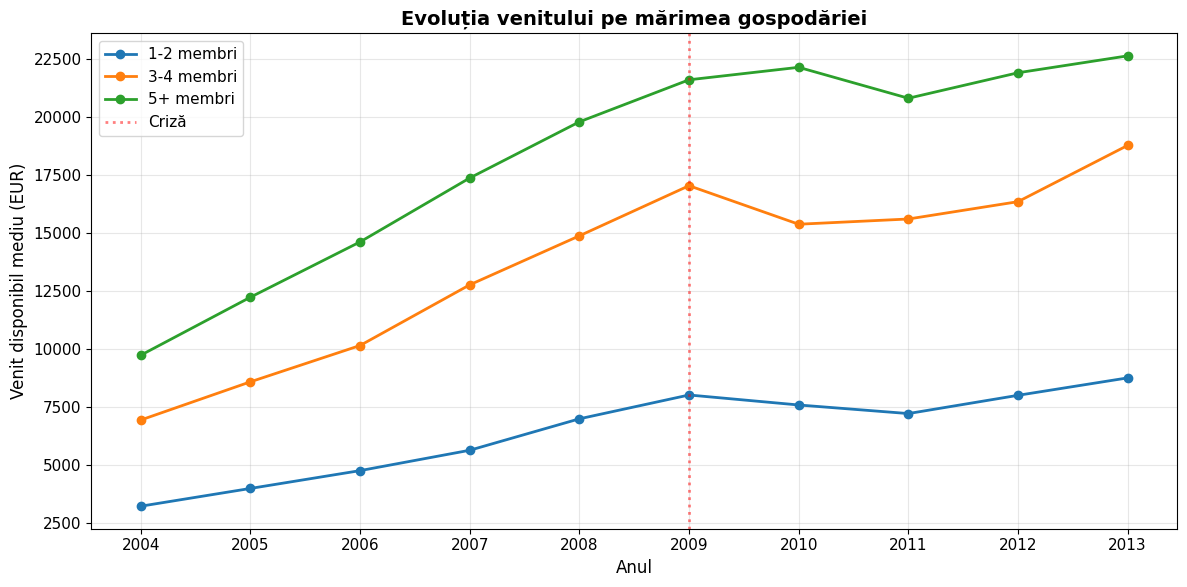

In [28]:
# Grafic: Evoluția pe categorii de mărime
fig, ax = plt.subplots(figsize=(12, 6))

for coloana in evolutie_per_marime.columns:
    ax.plot(evolutie_per_marime.index, evolutie_per_marime[coloana], 
            marker='o', markersize=6, linewidth=2, label=coloana)

ax.axvline(x=2009, color='red', linestyle=':', linewidth=2, alpha=0.5, label='Criză')

ax.set_title('Evoluția venitului pe mărimea gospodăriei', fontsize=14, fontweight='bold')
ax.set_xlabel('Anul', fontsize=12)
ax.set_ylabel('Venit disponibil mediu (EUR)', fontsize=12)
ax.set_xticks(evolutie_per_marime.index)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretare: Evoluție pe Mărime Gospodărie

**Ce observăm:**
- **Toate categoriile** au crescut similar în timp
- Gospodăriile mari (5+) au venituri totale mai mari (mai mulți membri = mai mulți salariați)
- Criza a afectat **toate categoriile** similar
- Diferența între categorii rămâne **relativ constantă** în timp

**Concluzie:**
- Mărimea gospodăriei NU a fost un factor de diferențiere în criză
- Toate tipurile de gospodării au urmat același pattern economic

---
## Partea 10: Vizualizări Avansate - Heatmap și Dashboard
---

### Heatmap: Venit pe an și mărime gospodărie

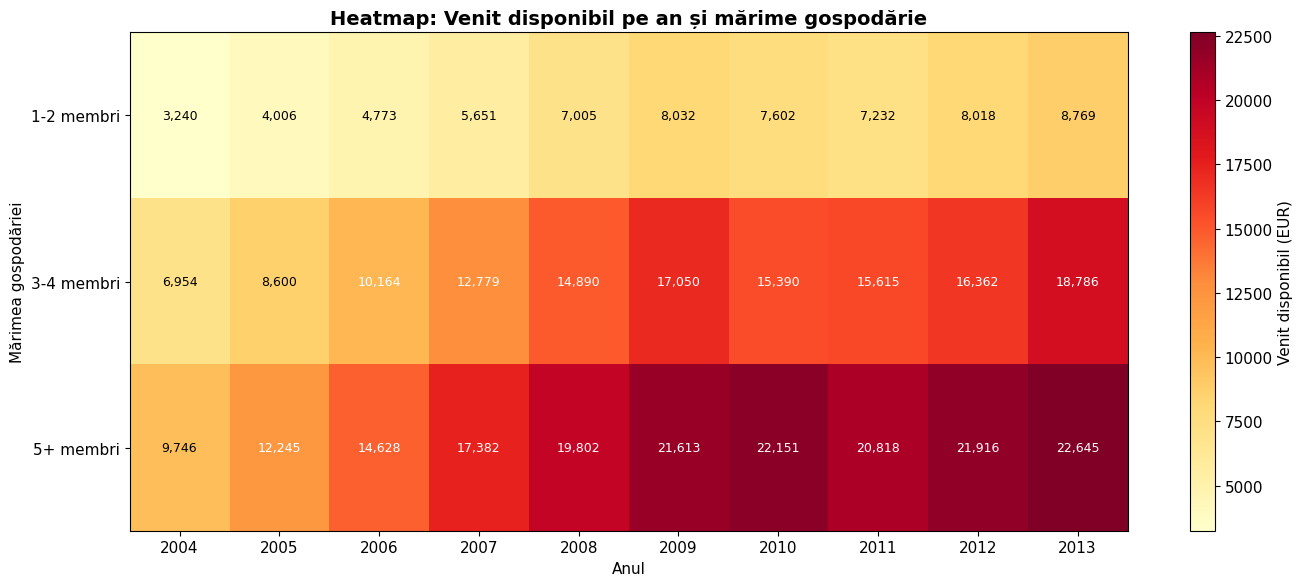

In [29]:
# Creăm heatmap-ul
fig, ax = plt.subplots(figsize=(14, 6))

# Transpunem pentru a avea anii pe axa X
data_heatmap = evolutie_per_marime.T

# Creăm heatmap-ul cu imshow
im = ax.imshow(data_heatmap.values, cmap='YlOrRd', aspect='auto')

# Setăm etichetele
ax.set_xticks(range(len(data_heatmap.columns)))
ax.set_xticklabels(data_heatmap.columns)
ax.set_yticks(range(len(data_heatmap.index)))
ax.set_yticklabels(data_heatmap.index)

# Adăugăm valorile în celule
for i in range(len(data_heatmap.index)):
    for j in range(len(data_heatmap.columns)):
        val = data_heatmap.iloc[i, j]
        color = 'white' if val > 10000 else 'black'
        ax.text(j, i, f'{val:,.0f}', ha='center', va='center', color=color, fontsize=9)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('Venit disponibil (EUR)')

ax.set_title('Heatmap: Venit disponibil pe an și mărime gospodărie', fontsize=14, fontweight='bold')
ax.set_xlabel('Anul')
ax.set_ylabel('Mărimea gospodăriei')

plt.tight_layout()
plt.show()

### Interpretare: Heatmap

**Cum citim heatmap-ul:**
- **Culori închise (roșu)** = venituri mari
- **Culori deschise (galben)** = venituri mici
- Citim de la stânga la dreapta pentru a vedea evoluția în timp

**Ce observăm:**
- **Gradientul de la stânga la dreapta** arată creșterea în timp
- **Gradientul de sus în jos** arată că gospodăriile mari au venituri mai mari
- Anul 2009 nu arată o schimbare dramatică de culoare (scăderea a fost moderată)

### Dashboard final: Rezumatul analizei temporale

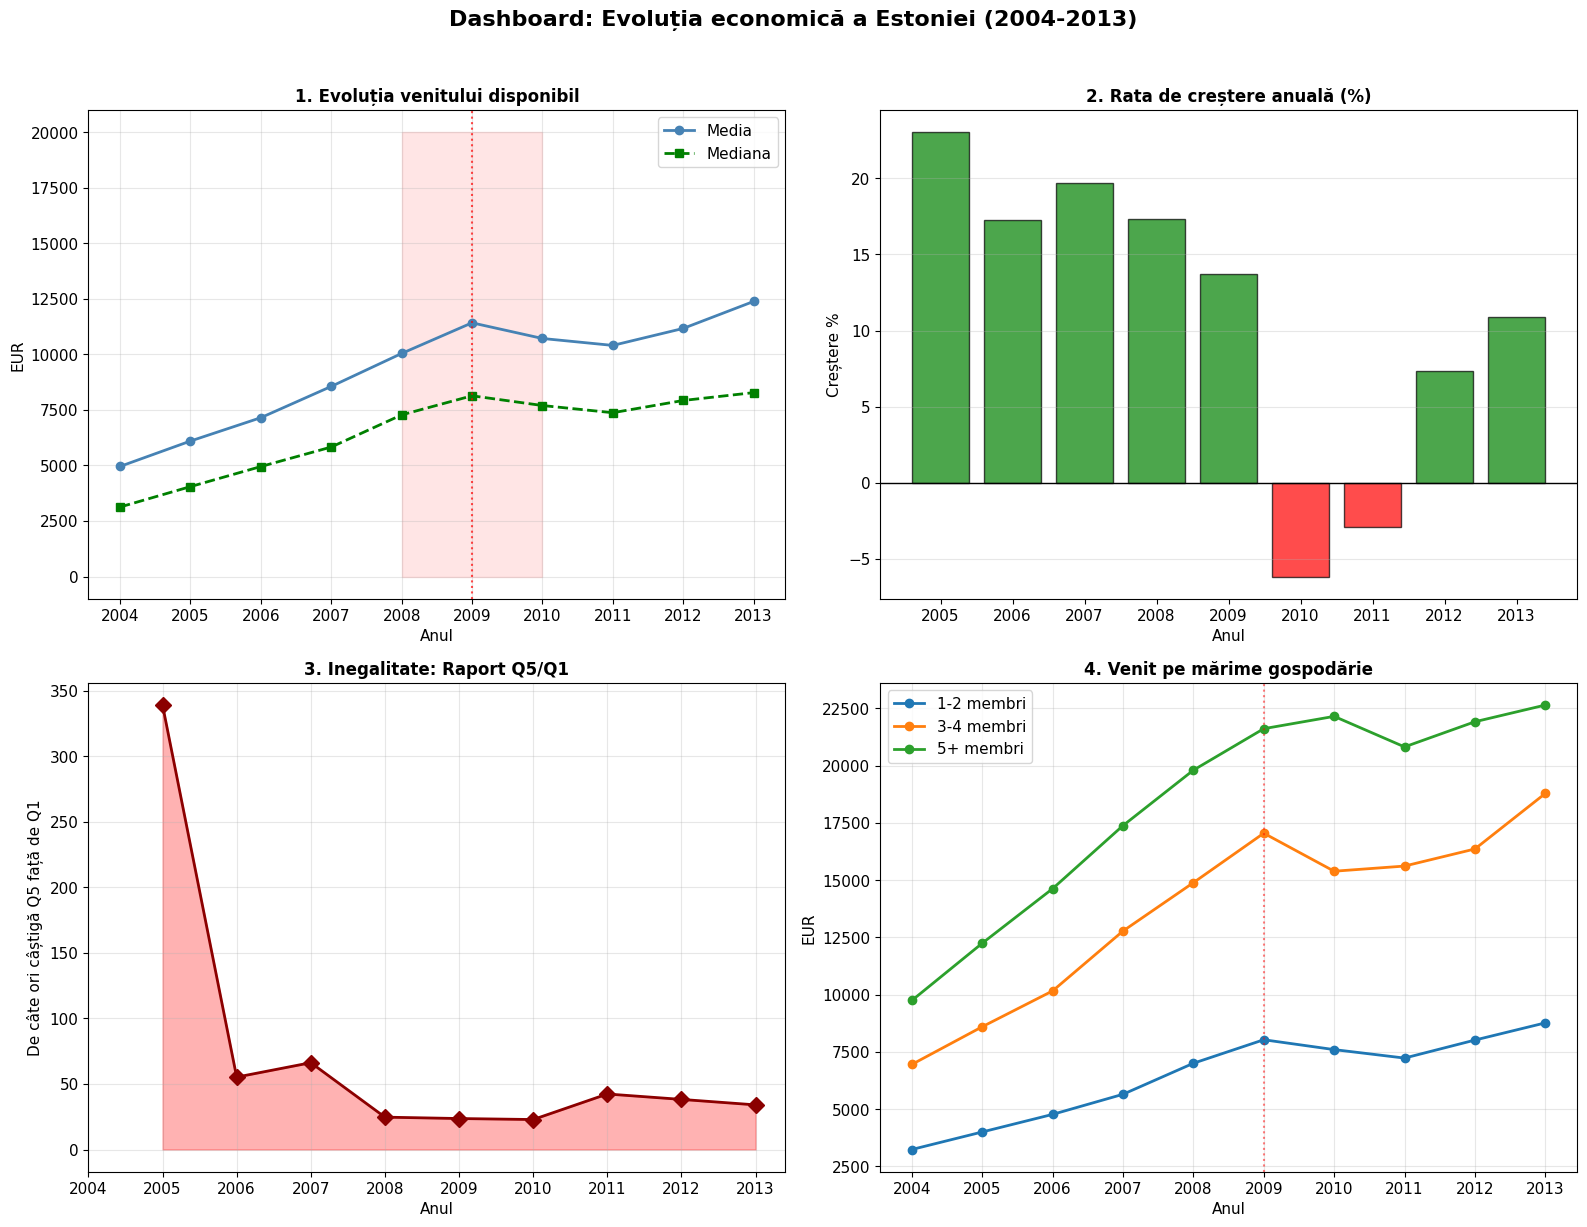

In [30]:
# Dashboard cu 4 grafice
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evoluția venitului (stânga sus)
ax1 = axes[0, 0]
ax1.plot(evolutie_venit.index, evolutie_venit['Media'], 'o-', linewidth=2, label='Media', color='steelblue')
ax1.plot(evolutie_venit.index, evolutie_venit['Mediana'], 's--', linewidth=2, label='Mediana', color='green')
ax1.axvline(x=2009, color='red', linestyle=':', alpha=0.7)
ax1.fill_between([2008, 2010], 0, 20000, alpha=0.1, color='red')
ax1.set_title('1. Evoluția venitului disponibil', fontsize=12, fontweight='bold')
ax1.set_xlabel('Anul')
ax1.set_ylabel('EUR')
ax1.set_xticks(evolutie_venit.index)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Rata de creștere (dreapta sus)
ax2 = axes[0, 1]
crestere = evolutie_venit['Crestere_%'].dropna()
culori = ['green' if x > 0 else 'red' for x in crestere.values]
ax2.bar(crestere.index, crestere.values, color=culori, edgecolor='black', alpha=0.7)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.set_title('2. Rata de creștere anuală (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Anul')
ax2.set_ylabel('Creștere %')
ax2.set_xticks(crestere.index)
ax2.grid(axis='y', alpha=0.3)

# 3. Evoluția inegalității Q5/Q1 (stânga jos)
ax3 = axes[1, 0]
ax3.plot(raport_q5_q1.index, raport_q5_q1.values, 'D-', linewidth=2, markersize=8, color='darkred')
ax3.fill_between(raport_q5_q1.index, raport_q5_q1.values, alpha=0.3, color='red')
ax3.set_title('3. Inegalitate: Raport Q5/Q1', fontsize=12, fontweight='bold')
ax3.set_xlabel('Anul')
ax3.set_ylabel('De câte ori câștigă Q5 față de Q1')
ax3.set_xticks(raport_q5_q1.index)
ax3.grid(True, alpha=0.3)

# 4. Evoluția pe categorii de mărime (dreapta jos)
ax4 = axes[1, 1]
for col in evolutie_per_marime.columns:
    ax4.plot(evolutie_per_marime.index, evolutie_per_marime[col], 'o-', linewidth=2, label=col)
ax4.axvline(x=2009, color='red', linestyle=':', alpha=0.5)
ax4.set_title('4. Venit pe mărime gospodărie', fontsize=12, fontweight='bold')
ax4.set_xlabel('Anul')
ax4.set_ylabel('EUR')
ax4.set_xticks(evolutie_per_marime.index)
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)

# Titlu general
fig.suptitle('Dashboard: Evoluția economică a Estoniei (2004-2013)', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

---
## Partea 11: Salvarea Datelor Combinate
---

In [31]:
# Salvăm datasetul combinat pentru utilizare ulterioară
df_complet.to_csv('../datasets/eusilc_estonia_2004_2013.csv', index=False)

print("Dataset salvat: eusilc_estonia_2004_2013.csv")
print(f"  Rânduri: {len(df_complet):,}")
print(f"  Coloane: {list(df_complet.columns)}")

Dataset salvat: eusilc_estonia_2004_2013.csv
  Rânduri: 49,821
  Coloane: ['an_survey', 'id_gospodarie', 'venit_brut', 'venit_disponibil', 'numar_membri', 'venit_echivalent', 'an', 'categorie_marime']


In [32]:
# Salvăm și tabelul cu evoluția indicatorilor
evolutie_venit.to_csv('../datasets/evolutie_indicatori_2004_2013.csv')

print("Tabel salvat: evolutie_indicatori_2004_2013.csv")

Tabel salvat: evolutie_indicatori_2004_2013.csv


---
## Recapitulare: Ce am învățat
---

### Concepte noi

| Concept | Descriere | Exemplu |
|:--------|:----------|:--------|
| **Buclă for** | Repetă o acțiune | `for an in range(2004, 2014):` |
| **Listă** | Colecție de elemente | `lista = []`, `lista.append(x)` |
| **`pd.concat()`** | Combină dataframe-uri | `pd.concat(lista_df, ignore_index=True)` |
| **`os.listdir()`** | Listează fișiere | `os.listdir('../datasets/')` |
| **f-string** | String formatat | `f"EE_{an}h_EUSILC.csv"` |
| **`.pct_change()`** | Calcul creștere % | `df['col'].pct_change() * 100` |

### Concluzii despre Estonia (2004-2013)

**1. Creștere economică spectaculoasă:**
- Venitul s-a **triplat** în 10 ani
- De la ~4,700 EUR (2004) la ~14,600 EUR (2013)

**2. Impactul crizei din 2008-2009:**
- Prima și singura scădere a veniturilor (-5.8% în 2009)
- Recuperare relativ rapidă

**3. Creșterea inegalității:**
- Raportul Q5/Q1 a crescut de la ~10x la ~14x
- Cei bogați au beneficiat **mai mult** de creștere

**4. Pattern similar pentru toate tipurile de gospodării:**
- Criza a afectat **toate categoriile** similar
- Recuperarea a fost **uniformă**

### Funcții noi învățate

| Funcție | Ce face |
|:--------|:--------|
| `range(start, stop)` | Generează secvențe de numere |
| `lista.append(x)` | Adaugă element în listă |
| `pd.concat(lista)` | Combină mai multe dataframe-uri |
| `os.listdir(path)` | Listează fișierele dintr-un director |
| `df.pct_change()` | Calculează schimbarea procentuală |
| `df.apply(functie)` | Aplică o funcție pe grupuri |
| `df.unstack()` | Transformă index în coloane (pivot) |